In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
## we can also write the above line of code as
## import matplotlib.pyplot as plt

In [33]:
datasets = load_diabetes()

In this we store the dataset inside the variable datasets

In [34]:
print(datasets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

This piece of code is used for giving a comprehensive understanding of the dataset

SO TO HAVE A BETTER UNDERSTANDING THE DATASET IS STORED IN FORM OF A DICTIONARY WHERE THE KEY 'DATA' IS THE BUNCH OF INDEPENDANT DETERMINING FEATURES OF THE 10 DIFFERENT KINDS AND 442 DIFFERENT INSTANCES AND THE KEY 'TARGET' IS THE DEPENDANT OUTPUT PARAMETER WHICH WE ARE TRYING TO PREDICT FROM THE REGRESSION MODEL WE ARE BUILDING

In [35]:
# the .size method returns the entire size or basically the total number of data-points records stored in the dataset
datasets['data'].size

4420

In [36]:
datasets['target'].shape

(442,)

In [37]:
datasets['data'].shape

(442, 10)

Simple Linear Regressor with the 1st independant variable age in the datset (i.e age) for predicting dependant feature. X_1 to Y

In [38]:
## This is our sole input parameter for our regression model
X = datasets['data'][...,0:1] ## 2-D array
## both the pieces of code above and below geenrate the same code but upper generates a 2-D array and the lower one generates a 1-D array
# X = datasets['data'][...,0] ## 1-D array
## This is our output parameter of our regression model
Y = datasets['target']
print(X,Y)

[[ 0.03807591]
 [-0.00188202]
 [ 0.08529891]
 [-0.08906294]
 [ 0.00538306]
 [-0.09269548]
 [-0.04547248]
 [ 0.06350368]
 [ 0.04170844]
 [-0.07090025]
 [-0.09632802]
 [ 0.02717829]
 [ 0.01628068]
 [ 0.00538306]
 [ 0.04534098]
 [-0.05273755]
 [-0.00551455]
 [ 0.07076875]
 [-0.0382074 ]
 [-0.02730979]
 [-0.04910502]
 [-0.0854304 ]
 [-0.0854304 ]
 [ 0.04534098]
 [-0.06363517]
 [-0.06726771]
 [-0.10722563]
 [-0.02367725]
 [ 0.05260606]
 [ 0.06713621]
 [-0.06000263]
 [-0.02367725]
 [ 0.03444337]
 [ 0.03081083]
 [ 0.01628068]
 [ 0.04897352]
 [ 0.01264814]
 [-0.00914709]
 [-0.00188202]
 [-0.00188202]
 [ 0.00538306]
 [-0.09996055]
 [-0.06000263]
 [ 0.01991321]
 [ 0.04534098]
 [ 0.02717829]
 [-0.05637009]
 [-0.07816532]
 [ 0.06713621]
 [-0.04183994]
 [ 0.03444337]
 [ 0.05987114]
 [-0.05273755]
 [-0.00914709]
 [-0.04910502]
 [-0.04183994]
 [-0.04183994]
 [-0.02730979]
 [ 0.04170844]
 [ 0.06350368]
 [-0.07090025]
 [-0.04183994]
 [-0.02730979]
 [-0.03457486]
 [ 0.06713621]
 [-0.04547248]
 [-0.00914

Text(0, 0.5, 'Diabetes Progression')

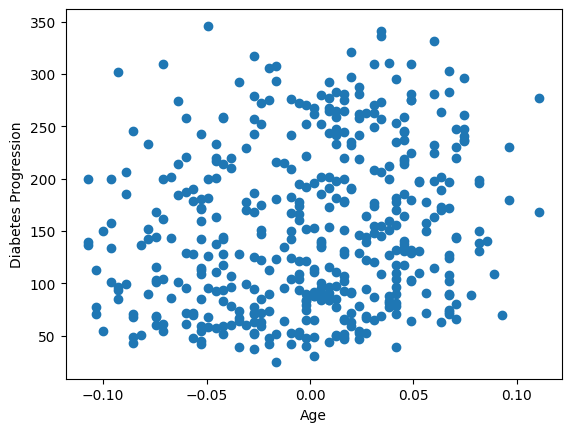

In [44]:
plt.scatter(X[...,0],Y)
plt.xlabel("Age")
plt.ylabel("Diabetes Progression")

Splitting the dataset into train & test dataset

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [53]:
print(x_train.shape, x_test.shape)

(353, 1) (89, 1)


In [76]:
print(x_test.size/(x_test.size + x_train.size)*(100))
## Hence we can see that the test data is actually 20% of the original dataset and the training dataset is 80% of the entire dataset
print(x_train.size/(x_test.size+x_train.size)*100)

20.13574660633484
79.86425339366517


Now we will be calling the Linear Regression function to fit and work our model for regression prediction

In [62]:
model = LinearRegression()

In [63]:
model.fit(x_train, y_train)

LinearRegression()

Now we will be prediciting the y using our test dataset

In [65]:
y_predicted = model.predict(x_test)

Text(0, 0.5, 'Diabetes Prediction')

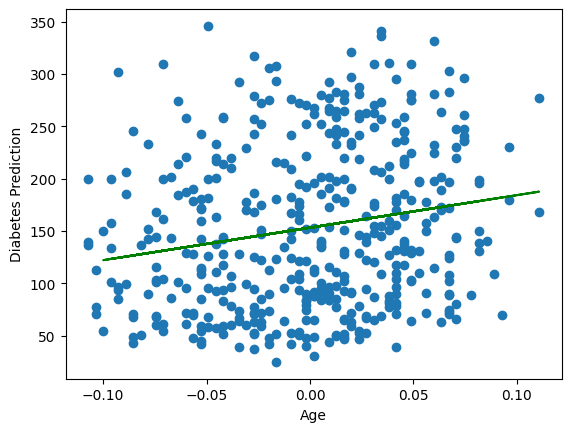

In [69]:
plt.scatter(X[...,0],Y)
plt.plot(x_test, y_predicted, color = 'green')
plt.xlabel('Age')
plt.ylabel('Diabetes Prediction')

In [80]:
## In order to prove the accuracy of the single parameter linear regression model that we have built we will be using the sklearn library
# y = wx + b
# w = co-efficient and b = intercept
## 1st element of the model prediction predicted_y[0]
## the .coef_ and .intercept_ attributes are those atributes that enable us to find the intercept of the linear regression
w = model.coef_
b = model.intercept_
## This are the
print("The co-efficient of the Linear Regression is: ", w[0])
print("The intercept of the linear regression is: ", b)

## In order to physically valididfy whether the test and predicted match or not
print(y_predicted[0] == w*x_test[0]+b)

The co-efficient of the Linear Regression is:  310.62707539044237
The intercept of the linear regression is:  153.27552409113594
[ True]


In [85]:
r2_err = r2_score(y_test, y_predicted)
mse_err = mean_squared_error(y_test, y_predicted)
print("The R2 scoer of the linear regression model is: ",r2_err)
print("The Mean Squared error is: ", mse_err)

The R2 scoer of the linear regression model is:  0.029200091310999876
The Mean Squared error is:  5600.888209667198


Mutli-variable Linear Regression

In [118]:
## Now in place of just taking 1 varaible for building the linear Regression model we will be using all the 10 variables for the model
X1 = datasets['data']
Y1 = datasets['target']

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.25)

In [120]:
print('Dimensions of training in-dependant variables',X_train.shape)
print('Dimensions of training dependant variable',Y_train.shape)
print('Dimenasions of Test in-dependant varaibles', X_test.shape)
print('Dimensions of Test dependant variables',Y_test.shape)

Dimensions of training in-dependant variables (331, 10)
Dimensions of training dependant variable (331,)
Dimenasions of Test in-dependant varaibles (111, 10)
Dimensions of Test dependant variables (111,)


In [121]:
model.fit(X_train, Y_train)

LinearRegression()

In [122]:
Y_predicted = model.predict(X_test)

In [123]:
R2_score = r2_score(Y_test, Y_predicted)
mean_err = mean_squared_error(Y_test, Y_predicted)

In [124]:
R2_score

0.36797060543384985

In [125]:
mean_err

2941.817212175376